# ODM2 API: Retrieve, manipulate and visualize ODM2 time series data

This example shows how to use the ODM2 Python API (`odm2api`) to connect to an ODM2 database, retrieve data, and analyze and visualize the data. The [database (USU_LittleBearRiver_timeseriesresults_ODM2.sqlite)](https://github.com/ODM2/ODM2PythonAPI/blob/master/Examples/data/USU_LittleBearRiver_timeseriesresults_ODM2.sqlite) contains ["timeSeriesCoverage"-type results](http://vocabulary.odm2.org/resulttype/timeSeriesCoverage/).

This example uses SQLite for the database because it doesn't require a server. However, the ODM2 Python API demonstrated here can alse be used with ODM2 databases implemented in MySQL, PostgreSQL or Microsoft SQL Server.

More details on the ODM2 Python API and its source code and latest development can be found at https://github.com/ODM2/ODM2PythonAPI

[Emilio Mayorga](https://github.com/emiliom/). Last updated 2018-10-7.

Adapted from notebook https://big-cz.github.io/notebook_data_demo/notebooks/2017-06-24-odm2api_sample_fromsqlite/, based on earlier code and an ODM2 database from [Jeff Horsburgh's group](http://jeffh.usu.edu) at Utah State University.

In [1]:
%matplotlib inline

import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

import odm2api
from odm2api.ODMconnection import dbconnection
import odm2api.services.readService as odm2rs

In [2]:
pd.__version__

u'0.23.4'

**odm2api version used** to run this notebook:

In [3]:
odm2api.__version__

u'0.7.1'

## Connect to the ODM2 SQLite Database

This example uses an ODM2 SQLite database file loaded with a sensor-based, high-frequency temperature time series from a site in the [Little Bear River, in Logan, Utah, from Utah State University](http://littlebearriver.usu.edu/). The [database (USU_LittleBearRiver_timeseriesresults_ODM2.sqlite)](https://github.com/ODM2/ODM2PythonAPI/blob/master/Examples/data/USU_LittleBearRiver_timeseriesresults_ODM2.sqlite) contains ["timeSeriesCoverage"-type results](http://vocabulary.odm2.org/resulttype/timeSeriesCoverage/).

The example database is located in the `data` sub-directory.

In [4]:
# Assign directory paths and SQLite file name
dbname_sqlite = "USU_LittleBearRiver_timeseriesresults_ODM2.sqlite"

sqlite_pth = os.path.join("data", dbname_sqlite)

In [5]:
try:
    session_factory = dbconnection.createConnection('sqlite', sqlite_pth)
    read = odm2rs.ReadODM2(session_factory)
    print("Database connection successful!")
except Exception as e:
    print("Unable to establish connection to the database: ", e)

Database connection successful!


## Run Some Basic Queries on the ODM2 Database

This section shows some examples of how to use the API to run both simple and more advanced queries on the ODM2 database, as well as how to examine the query output in convenient ways thanks to Python tools. The notebook [WaterQualityMeasurements_RetrieveVisualize.ipynb](https://github.com/ODM2/ODM2PythonAPI/blob/master/Examples/WaterQualityMeasurements_RetrieveVisualize.ipynb) includes more extensive examples of `odm2api`-based querying and examinations of the information that is returned.

Simple query functions like **getVariables( )** return objects similar to the entities in ODM2, and individual attributes can then be retrieved from the objects returned. 

In [6]:
allVars = read.getVariables()

for x in allVars:
    print('{}: {}'.format(x.VariableCode, x.VariableNameCV))

USU36: Temperature


### SamplingFeatures
Request all sampling features, then examine them. Only one sampling feature is present, with `SamplingFeatureTypeCV` type `Site`.

In [7]:
sf_lst = read.getSamplingFeatures()
len(sf_lst)

1

In [8]:
vars(sf_lst[0])

{'ElevationDatumCV': u'NGVD29',
 'Elevation_m': 1345.0,
 'FeatureGeometryWKT': u'POINT (-111.946402 41.718473)',
 'SamplingFeatureCode': u'USU-LBR-Mendon',
 'SamplingFeatureDescription': None,
 'SamplingFeatureGeotypeCV': u'Point',
 'SamplingFeatureID': 1,
 'SamplingFeatureName': u'Little Bear River at Mendon Road near Mendon, Utah',
 'SamplingFeatureTypeCV': u'Site',
 'SamplingFeatureUUID': u'6c74a4bd-e1d4-11e5-95b8-f45c8999816f',
 '_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc8bc53a690>}

In [9]:
print('{}: {}'.format(sf_lst[0].SamplingFeatureCode, sf_lst[0].SamplingFeatureName))

USU-LBR-Mendon: Little Bear River at Mendon Road near Mendon, Utah


### Results and Actions

You can also drill down and get objects linked by foreign keys. The API returns related objects in a nested hierarchy so they can be interrogated in an object oriented way. So, if I use the **getResults( )** function to return a Result from the database (e.g., a "Time Series" Result), I also get the associated Action that created that Result (e.g., an "Observation" Action).

In [10]:
# What's the total number of results in the database?
len(read.getResults())

1

In [11]:
try:
    # Call getResults, but return only the first Result
    firstResult = read.getResults()[0]
    frfa = firstResult.FeatureActionObj
    frfaa = firstResult.FeatureActionObj.ActionObj
    print("The ResultID for the Result is: {}".format(firstResult.ResultID))
    print("The FeatureAction object for the Result is: ", frfa)
    print("The Action object for the Result is: ", frfaa)
    
    # Print some Action attributes in a more human readable form
    print("\nThe following are some of the attributes for the Action that created the Result: ")
    print("ActionTypeCV: {}".format(frfaa.ActionTypeCV))
    print("ActionDescription: {}".format(frfaa.ActionDescription))
    print("BeginDateTime: {}".format(frfaa.BeginDateTime))
    print("EndDateTime: {}".format(frfaa.EndDateTime))
    print("MethodName: {}".format(frfaa.MethodObj.MethodName))
    print("MethodDescription: {}".format(frfaa.MethodObj.MethodDescription))
except Exception as e:
    print("Unable to demo Foreign Key Example: {}".format(e))

The ResultID for the Result is: 1
('The FeatureAction object for the Result is: ', <FeatureActions({'FeatureActionID': 1, 'SamplingFeatureID': 1, 'ActionID': 1})>)
('The Action object for the Result is: ', <Actions({'MethodID': 1, 'ActionDescription': u'An observation action that generated a time series result.', 'ActionFileLink': None, 'EndDateTime': datetime.datetime(2009, 1, 16, 12, 30), 'BeginDateTime': datetime.datetime(2007, 8, 16, 16, 30), 'BeginDateTimeUTCOffset': -7, 'ActionTypeCV': u'Observation', 'ActionID': 1, 'EndDateTimeUTCOffset': -7})>)

The following are some of the attributes for the Action that created the Result: 
ActionTypeCV: Observation
ActionDescription: An observation action that generated a time series result.
BeginDateTime: 2007-08-16 16:30:00
EndDateTime: 2009-01-16 12:30:00
MethodName: Quality Control Level 1 Data Series created from raw QC Level 0 data using ODM Tools.
MethodDescription: Quality Control Level 1 Data Series created from raw QC Level 0 data 

### Retrieve Attributes of a Time Series Result using a ResultID
Use the ResultID (1) from the above result to issue a filtered query.

In [12]:
# Filering on a single ResultID will invariably return a single result; 
# so, get the single element in the returned list
tsResult = read.getResults(ids=[1])[0]

# Examine the object type and content
type(tsResult), vars(tsResult)

(odm2api.models.TimeSeriesResults,
 {'FeatureActionID': 1,
  'FeatureActionObj': <FeatureActions({'FeatureActionID': 1, 'SamplingFeatureID': 1, 'ActionID': 1})>,
  'ProcessingLevelID': 1,
  'ResultDateTime': datetime.datetime(2016, 3, 3, 23, 43, 37, 369446),
  'ResultDateTimeUTCOffset': -7,
  'ResultID': 1,
  'ResultTypeCV': u'Time series coverage',
  'ResultUUID': u'6c769102-e1d4-11e5-8d14-f45c8999816f',
  'SampledMediumCV': u'Surface Water',
  'StatusCV': u'Unknown',
  'TaxonomicClassifierID': None,
  'UnitsID': 96,
  'ValidDateTime': None,
  'ValidDateTimeUTCOffset': None,
  'ValueCount': 24206,
  'VariableID': 1,
  '_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc8bc4d6d90>})

### Get a Result and its Attributes

Because all of the objects are returned in a nested form, if you retrieve a result, you can interrogate it to get all of its related attributes. When a Result object is returned, it includes objects that contain information about Variable, Units, ProcessingLevel, and the related Action that created that Result.

In [13]:
print("------- Example of Retrieving Attributes of a Result -------")
try:
    firstResult = read.getResults()[0]
    frfa = firstResult.FeatureActionObj
    print("The following are some of the attributes for the Result retrieved: ")
    print("ResultID: {}".format(firstResult.ResultID))
    print("ResultTypeCV: {}".format(firstResult.ResultTypeCV))
    print("ValueCount: {}".format(firstResult.ValueCount))
    print("ProcessingLevel: {}".format(firstResult.ProcessingLevelObj.Definition))
    print("SampledMedium: {}".format(firstResult.SampledMediumCV))
    print("Variable: {}: {}".format(firstResult.VariableObj.VariableCode, 
                                    firstResult.VariableObj.VariableNameCV))
    print("AggregationStatisticCV: {}".format(firstResult.AggregationStatisticCV))
    print("Units: {}".format(firstResult.UnitsObj.UnitsName))
    print("SamplingFeatureID: {}".format(frfa.SamplingFeatureObj.SamplingFeatureID))
    print("SamplingFeatureCode: {}".format(frfa.SamplingFeatureObj.SamplingFeatureCode))
except Exception as e:
    print("Unable to demo example of retrieving Attributes of a Result: {}".format(e))

------- Example of Retrieving Attributes of a Result -------
The following are some of the attributes for the Result retrieved: 
ResultID: 1
ResultTypeCV: Time series coverage
ValueCount: 24206
ProcessingLevel: Quality controlled data
SampledMedium: Surface Water
Variable: USU36: Temperature
AggregationStatisticCV: Average
Units: degree celsius
SamplingFeatureID: 1
SamplingFeatureCode: USU-LBR-Mendon


-----------------------------------------

## Retrieve Time Series Result Values for a given Result

The database contains a single time series result (a time series of water temperature sensor data at a single site). Let's use the **getResults( )** function to retrieve the time series values for this result by passing in the ResultID. We set the index to `ValueDateTime` for convenience.

In [14]:
# Get the values for a particular TimeSeriesResult; a Pandas Dataframe is returned
tsValues = read.getResultValues(resultids=[1], lowercols=False)
tsValues.loc[:, 'ValueDateTime'] = pd.to_datetime(tsValues['ValueDateTime'])
tsValues.set_index('ValueDateTime', inplace=True)
tsValues.sort_index(inplace=True)

tsValues.head()

,ValueID,ResultID,DataValue,ValueDateTimeUTCOffset,CensorCodeCV,QualityCodeCV,TimeAggregationInterval,TimeAggregationIntervalUnitsID
ValueDateTime,,,,,,,,
2007-08-16 16:30:00,1,1,22.20000,-7,nc,Unknown,30.0,102
2007-08-16 17:00:00,2,1,22.19833,-7,nc,Unknown,30.0,102
2007-08-16 17:30:00,3,1,22.18500,-7,nc,Unknown,30.0,102
2007-08-16 18:00:00,4,1,22.03833,-7,nc,Unknown,30.0,102
2007-08-16 18:30:00,5,1,21.88167,-7,nc,Unknown,30.0,102


**10/5/2018. NOTE CURRENT ISSUE REGARDING `ValueDateTime` RETURNED BY `read.getResultValues`.** There seems to be an unexpected behavior with the data type returned for `ValueDateTime` for SQLite databases. It should be a datetime, but it's currently a string. This is [being investigated](https://github.com/ODM2/ODM2PythonAPI/issues/158). For now, we are converting to a datetime manually, above, via the statement:
```python
resultValues.loc[:, 'ValueDateTime'] = pd.to_datetime(resultValues['ValueDateTime'])
```
This problem is present in `odm2api` version 0.7.1, but was not present in Nov. 2017

### Now plot the time series
First as a very quick and easy plot using the Pandas Dataframe `plot` method with default settings. Then with fancier matplotlib customizations of the axes and figure size.

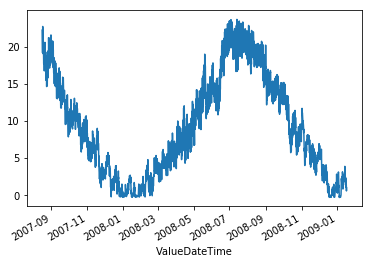

In [15]:
tsValues['DataValue'].plot()

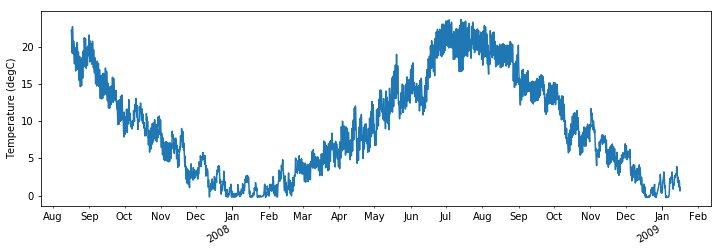

In [16]:
fig, ax = plt.subplots(figsize=(12, 4))
tsValues['DataValue'].plot(ax=ax)

ax.set_ylabel('{} ({})'.format(
    tsResult.VariableObj.VariableNameCV, tsResult.UnitsObj.UnitsAbbreviation))
ax.set_xlabel('')

ax.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%Y'))